Análise Exploratória  
Feature Enginering  
Modelos de IA - Random Forest e Gradient Boosting (Xgboost)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [3]:
#df_clas = pd.read_csv("/content/drive/My Drive/Colab Notebooks/classificados.csv", encoding="utf-8")
df_clas = pd.read_csv("classificados.csv", encoding="utf-8")

In [4]:
#df_des = pd.read_csv("/content/drive/My Drive/Colab Notebooks/desclassificados.csv", encoding="utf-8")
df_des = pd.read_csv("desclassificados.csv", encoding="utf-8")

Importar dicionario

In [5]:
dic = pd.read_csv("dicionario_microdados.csv",sep=";")

In [6]:
dic = dic.set_index('variavel')['descricao'].to_dict()

In [7]:
dic

{'NU_INSCRICAO': 'Numero de inscrição',
 'NU_ANO': 'Ano do Enem',
 'CO_MUNICIPIO_RESIDENCIA': 'Código do município de residência ',
 'NO_MUNICIPIO_RESIDENCIA': 'Nome do município de residência',
 'CO_UF_RESIDENCIA': 'Código da Unidade da Federação de residência',
 'SG_UF_RESIDENCIA': 'Sigla da Unidade da Federação de residência',
 'NU_IDADE': 'Idade',
 'TP_SEXO': 'Sexo',
 'TP_ESTADO_CIVIL': 'Estado Civil',
 'TP_COR_RACA': 'Cor/raça',
 'TP_NACIONALIDADE': 'Nacionalidade',
 'CO_MUNICIPIO_NASCIMENTO': 'Código do município de nascimento',
 'NO_MUNICIPIO_NASCIMENTO': 'Nome do município de nascimento',
 'CO_UF_NASCIMENTO': 'Código da Unidade da Federação de nascimento',
 'SG_UF_NASCIMENTO': 'Sigla da Unidade da Federação de nascimento',
 'TP_ST_CONCLUSAO': 'Situação de conclusão do Ensino Médio',
 'TP_ANO_CONCLUIU': 'Ano de Conclusão do Ensino Médio',
 'TP_ESCOLA': 'Tipo de escola do Ensino Médio',
 'TP_ENSINO': 'Tipo de instituição que concluiu ou concluirá o Ensino Médio ',
 'IN_TREINEIRO'

### Junta as duas bases 

In [8]:
df_clas = df_clas.sample(n=591116,random_state=123)

In [9]:
df = df_clas.append(df_des)

In [10]:
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)

Remover as variavéis de notas e média (correlação com variavel resposta)

In [11]:
columns_drop = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','MEDIA_FINAL','NU_NOTA_REDACAO']
df.drop(columns_drop, inplace=True, axis=1)

#### Verificar balanceamento

In [12]:
count = pd.DataFrame(df['Classificado'].value_counts())

percent = pd.DataFrame(df['Classificado'].value_counts(normalize=True)*100)

table = pd.concat([count, percent], axis=1)

table.columns = ['# target', '% target']
table

,# target,% target
1,591116,50.0
0,591116,50.0


### Análise Exploratória
A parte de univariada que foi add a apresentação foram feitas no colab

In [13]:
df.head()

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,...,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Classificado
104354,Juiz de Fora,MG,17.0,M,0.0,1,1,Juiz de Fora,MG,2,...,E,B,B,E,B,D,B,B,D,0
615010,Picos,PI,17.0,F,0.0,1,1,Picos,PI,2,...,D,A,B,E,A,D,B,B,D,0
680984,Gandu,BA,23.0,M,0.0,1,1,Jaguaquara,BA,1,...,B,A,A,B,A,B,B,A,D,0
22451,Viçosa,MG,18.0,F,0.0,2,2,NaN,NaN,1,...,B,B,A,D,A,B,B,A,A,0
328498,São Bernardo do Campo,SP,18.0,F,0.0,1,1,São Paulo,SP,2,...,D,B,B,D,B,C,B,B,D,0


In [14]:
df.describe()

,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Q005,Classificado
count,1.182218e+06,1.142167e+06,1.182232e+06,1.182232e+06,1.182232e+06,1.182232e+06,1.182232e+06,872754.000000,411186.000000,411186.000000,1.182232e+06,1.182232e+06,1.182232e+06,1.182232e+06,1.182232e+06,1.182232e+06,1.182232e+06,1.182232e+06,1182232.0
mean,2.264174e+01,1.141935e-01,2.226632e+00,1.043497e+00,1.395648e+00,2.886790e+00,1.438208e+00,1.197106,2.260186,1.038914,5.909094e-01,1.223072e+00,1.102787e+02,8.137398e+01,7.733612e+01,1.049131e+02,5.439382e+01,4.005655e+00,0.5
std,7.874782e+00,3.699189e-01,9.977445e-01,2.406312e-01,4.889897e-01,3.890578e+00,7.349317e-01,0.591899,0.719694,0.193391,4.916662e-01,1.015285e+00,3.667220e+01,5.057206e+01,4.773512e+01,3.890112e+01,4.895934e+01,1.566158e+00,0.5
min,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0
25%,1.800000e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000,2.000000,1.000000,0.000000e+00,1.000000e+00,1.000000e+02,4.000000e+01,4.000000e+01,8.000000e+01,2.000000e+01,3.000000e+00,0.0
50%,1.900000e+01,0.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,2.000000,1.000000,1.000000e+00,1.000000e+00,1.200000e+02,6.000000e+01,6.000000e+01,1.000000e+02,4.000000e+01,4.000000e+00,0.5
75%,2.400000e+01,0.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,1.000000,2.000000,1.000000,1.000000e+00,1.000000e+00,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,8.000000e+01,5.000000e+00,1.0
max,8.700000e+01,3.000000e+00,5.000000e+00,4.000000e+00,2.000000e+00,1.200000e+01,4.000000e+00,3.000000,4.000000,2.000000,1.000000e+00,9.000000e+00,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+01,1.0


In [15]:
df.dtypes

NO_MUNICIPIO_RESIDENCIA     object
SG_UF_RESIDENCIA            object
NU_IDADE                   float64
TP_SEXO                     object
TP_ESTADO_CIVIL            float64
TP_COR_RACA                  int64
TP_NACIONALIDADE             int64
NO_MUNICIPIO_NASCIMENTO     object
SG_UF_NASCIMENTO            object
TP_ST_CONCLUSAO              int64
TP_ANO_CONCLUIU              int64
TP_ESCOLA                    int64
TP_ENSINO                  float64
NO_MUNICIPIO_ESC            object
SG_UF_ESC                   object
TP_DEPENDENCIA_ADM_ESC     float64
TP_LOCALIZACAO_ESC         float64
NO_MUNICIPIO_PROVA          object
SG_UF_PROVA                 object
TP_LINGUA                    int64
TP_STATUS_REDACAO            int64
NU_NOTA_COMP1                int64
NU_NOTA_COMP2                int64
NU_NOTA_COMP3                int64
NU_NOTA_COMP4                int64
NU_NOTA_COMP5                int64
Q001                        object
Q002                        object
Q003                

Analise Bivariada (variavéis quali - questionário socio economico)

In [16]:
quali_quest= ["Q001","Q002","Q003","Q004","Q005","Q006","Q007","Q008","Q009","Q010","Q011","Q012","Q013","Q014","Q015","Q016","Q017","Q018","Q019","Q020","Q021","Q022","Q023","Q024","Q025","Q026","Q027",'Classificado']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


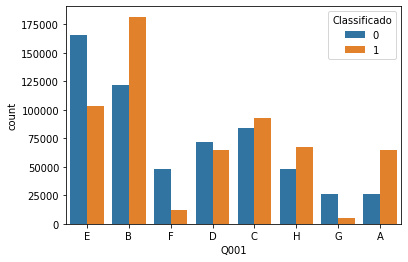

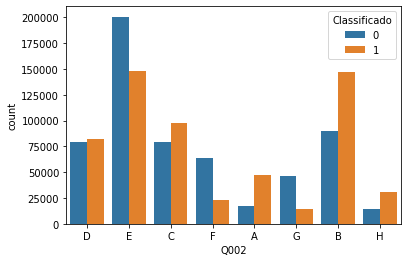

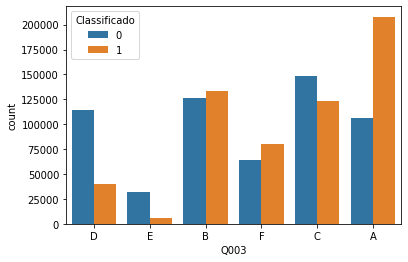

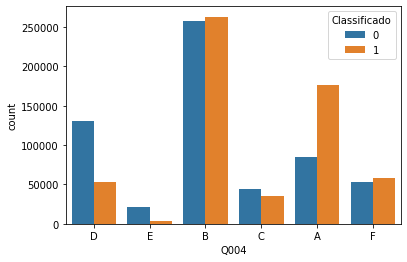

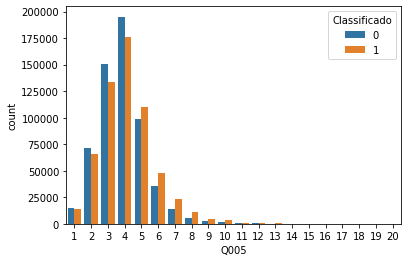

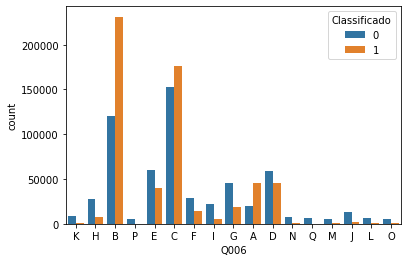

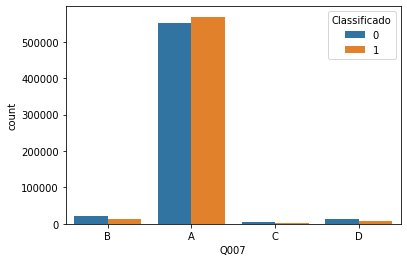

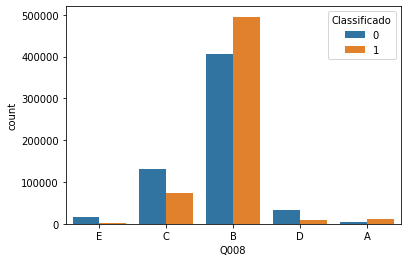

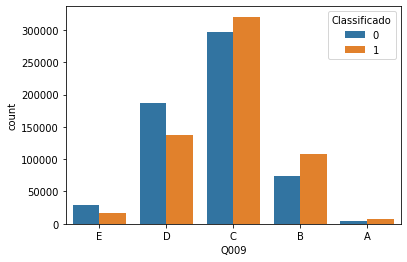

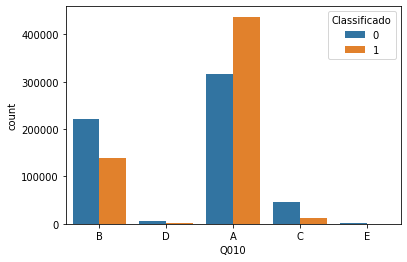

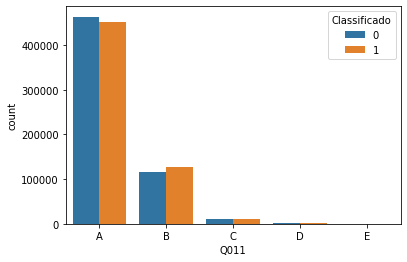

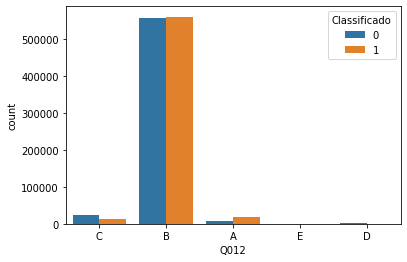

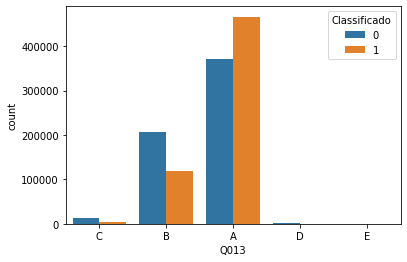

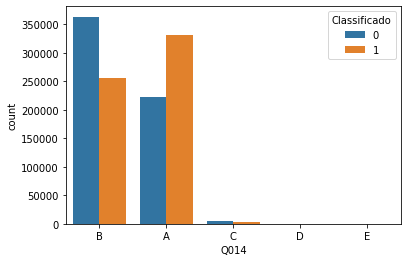

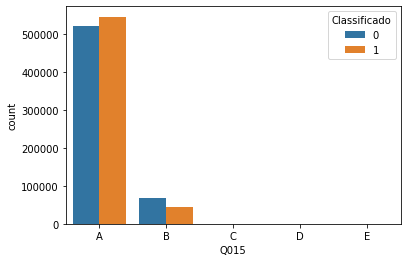

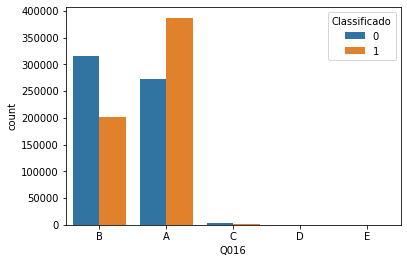

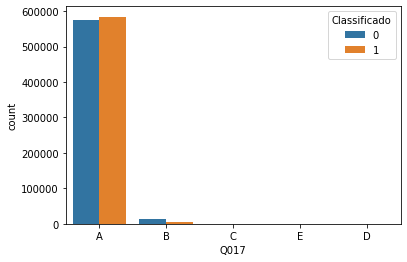

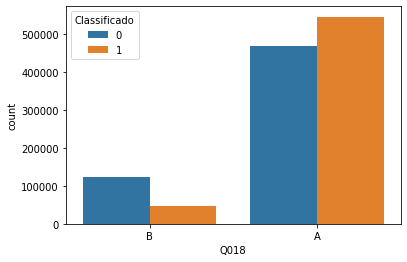

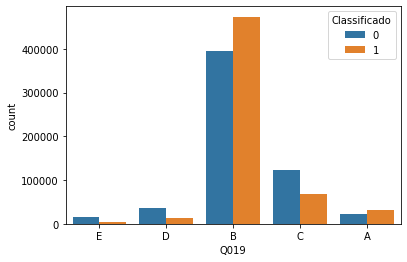

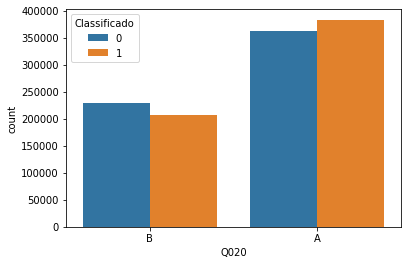

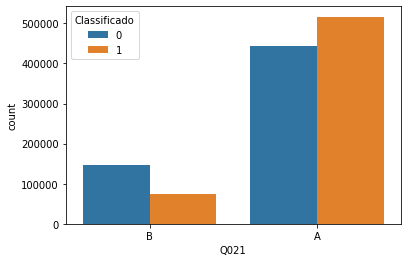

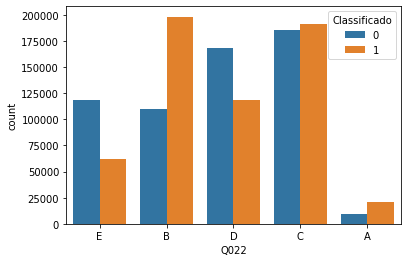

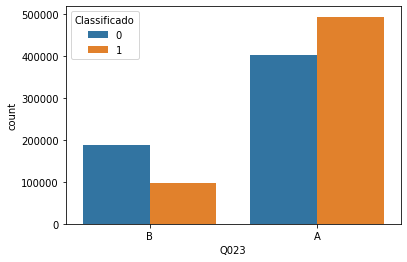

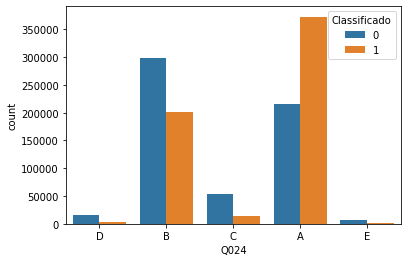

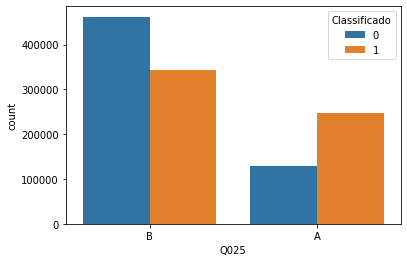

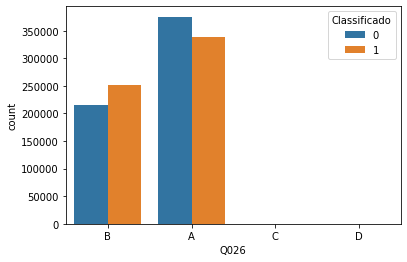

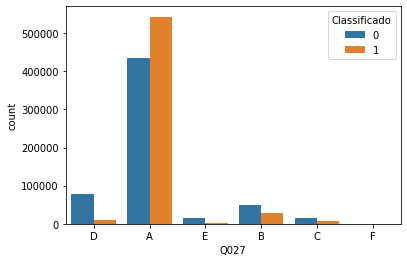

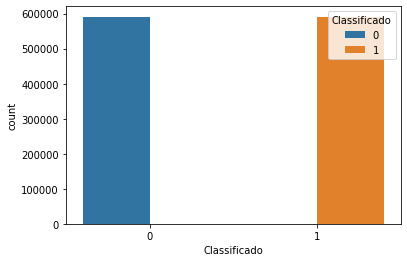

In [18]:
df1 = df[quali_quest]

for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.countplot(x=col,data=df1,hue='Classificado');


## Variaveis Qualitativas

In [17]:
quali = ['SG_UF_RESIDENCIA', 'TP_SEXO', 'TP_ESTADO_CIVIL','TP_NACIONALIDADE','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC',
       'TP_COR_RACA', 'SG_UF_NASCIMENTO', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'TP_ENSINO', 'SG_UF_PROVA', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
        'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025', 'Q026', 'Q027']

#Converter para object

In [18]:
df[quali] = df[quali].astype(object)

In [19]:
df.dtypes

NO_MUNICIPIO_RESIDENCIA     object
SG_UF_RESIDENCIA            object
NU_IDADE                   float64
TP_SEXO                     object
TP_ESTADO_CIVIL             object
TP_COR_RACA                 object
TP_NACIONALIDADE            object
NO_MUNICIPIO_NASCIMENTO     object
SG_UF_NASCIMENTO            object
TP_ST_CONCLUSAO             object
TP_ANO_CONCLUIU             object
TP_ESCOLA                   object
TP_ENSINO                   object
NO_MUNICIPIO_ESC            object
SG_UF_ESC                   object
TP_DEPENDENCIA_ADM_ESC      object
TP_LOCALIZACAO_ESC          object
NO_MUNICIPIO_PROVA          object
SG_UF_PROVA                 object
TP_LINGUA                   object
TP_STATUS_REDACAO           object
NU_NOTA_COMP1                int64
NU_NOTA_COMP2                int64
NU_NOTA_COMP3                int64
NU_NOTA_COMP4                int64
NU_NOTA_COMP5                int64
Q001                        object
Q002                        object
Q003                

## Variaveis Quantitativas

In [20]:
df.select_dtypes(np.number).head().columns

Index(['NU_IDADE', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'Q005', 'Classificado'],
      dtype='object')

In [21]:
quanti = ('NU_IDADE', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5','Q005')

### Tratamento missing

In [22]:
df.isnull().sum() / len(df) *100

NO_MUNICIPIO_RESIDENCIA     0.000000
SG_UF_RESIDENCIA            0.000000
NU_IDADE                    0.001184
TP_SEXO                     0.000000
TP_ESTADO_CIVIL             3.388929
TP_COR_RACA                 0.000000
TP_NACIONALIDADE            0.000000
NO_MUNICIPIO_NASCIMENTO     3.850767
SG_UF_NASCIMENTO            3.850767
TP_ST_CONCLUSAO             0.000000
TP_ANO_CONCLUIU             0.000000
TP_ESCOLA                   0.000000
TP_ENSINO                  26.177434
NO_MUNICIPIO_ESC           65.219517
SG_UF_ESC                  65.219517
TP_DEPENDENCIA_ADM_ESC     65.219517
TP_LOCALIZACAO_ESC         65.219517
NO_MUNICIPIO_PROVA          0.000000
SG_UF_PROVA                 0.000000
TP_LINGUA                   0.000000
TP_STATUS_REDACAO           0.000000
NU_NOTA_COMP1               0.000000
NU_NOTA_COMP2               0.000000
NU_NOTA_COMP3               0.000000
NU_NOTA_COMP4               0.000000
NU_NOTA_COMP5               0.000000
Q001                        0.000000
Q

In [23]:
for col in df.columns:
 total = df[col].isnull().sum() / len(df) *100
 if total != 0.0:
    print(col, total)

NU_IDADE 0.0011842007321743956
TP_ESTADO_CIVIL 3.3889287381833686
NO_MUNICIPIO_NASCIMENTO 3.850767023731383
SG_UF_NASCIMENTO 3.850767023731383
TP_ENSINO 26.177433870847683
NO_MUNICIPIO_ESC 65.2195169814385
SG_UF_ESC 65.2195169814385
TP_DEPENDENCIA_ADM_ESC 65.2195169814385
TP_LOCALIZACAO_ESC 65.2195169814385
Q026 0.0001691715331677708


Remover variaveis com mais de 50% missing

In [22]:
columns_drop = ['NO_MUNICIPIO_ESC','SG_UF_ESC','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC']
df.drop(columns_drop, inplace=True, axis=1)

Remover linhas com missing values < 5%

In [23]:
df = df.dropna(subset = ['NU_IDADE','TP_ESTADO_CIVIL','NO_MUNICIPIO_NASCIMENTO','SG_UF_NASCIMENTO','Q026'])

Substituir missing de TP_ENSINO (26%) eplo valor mais frequente

In [24]:
df['TP_ENSINO'].value_counts(normalize=True)

1.0    0.902697
3.0    0.092432
2.0    0.004871
Name: TP_ENSINO, dtype: float64

In [25]:
df['TP_ENSINO'].fillna(1.0,inplace=True)

In [26]:
df['TP_ENSINO'].isnull().sum()

0

In [27]:
df.shape

(1098311, 50)

Verificar cardinalidade

In [28]:
df.nunique()

NO_MUNICIPIO_RESIDENCIA    5294
SG_UF_RESIDENCIA             27
NU_IDADE                     76
TP_SEXO                       2
TP_ESTADO_CIVIL               4
TP_COR_RACA                   6
TP_NACIONALIDADE              1
NO_MUNICIPIO_NASCIMENTO    5148
SG_UF_NASCIMENTO             27
TP_ST_CONCLUSAO               2
TP_ANO_CONCLUIU              13
TP_ESCOLA                     4
TP_ENSINO                     3
NO_MUNICIPIO_PROVA         1690
SG_UF_PROVA                  27
TP_LINGUA                     2
TP_STATUS_REDACAO             8
NU_NOTA_COMP1                11
NU_NOTA_COMP2                10
NU_NOTA_COMP3                11
NU_NOTA_COMP4                11
NU_NOTA_COMP5                11
Q001                          8
Q002                          8
Q003                          6
Q004                          6
Q005                         20
Q006                         17
Q007                          4
Q008                          5
Q009                          5
Q010    

In [29]:
for col in df.columns:
 total = df[col].nunique()
 if total >= 10:
    print(col, total)

NO_MUNICIPIO_RESIDENCIA 5294
SG_UF_RESIDENCIA 27
NU_IDADE 76
NO_MUNICIPIO_NASCIMENTO 5148
SG_UF_NASCIMENTO 27
TP_ANO_CONCLUIU 13
NO_MUNICIPIO_PROVA 1690
SG_UF_PROVA 27
NU_NOTA_COMP1 11
NU_NOTA_COMP2 10
NU_NOTA_COMP3 11
NU_NOTA_COMP4 11
NU_NOTA_COMP5 11
Q005 20
Q006 17


Excluir variaveis categoricas com cardinalidade muito alta > 1000

In [30]:
columns_drop = ['NO_MUNICIPIO_RESIDENCIA','NO_MUNICIPIO_NASCIMENTO','NO_MUNICIPIO_PROVA']
df.drop(columns_drop, inplace=True, axis=1)

Alta e baixa cardinalidade

In [31]:
df.select_dtypes(include=['object']).columns

Index(['SG_UF_RESIDENCIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'SG_UF_NASCIMENTO', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'SG_UF_PROVA', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q006', 'Q007',
       'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016',
       'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025',
       'Q026', 'Q027'],
      dtype='object')

In [32]:
for col in df.astype(object).columns:
 total = df[col].nunique()
 if total >= 10:
    print(col, total)

SG_UF_RESIDENCIA 27
NU_IDADE 76
SG_UF_NASCIMENTO 27
TP_ANO_CONCLUIU 13
SG_UF_PROVA 27
NU_NOTA_COMP1 11
NU_NOTA_COMP2 10
NU_NOTA_COMP3 11
NU_NOTA_COMP4 11
NU_NOTA_COMP5 11
Q005 20
Q006 17


In [33]:
'''cat_high_card = ['SG_UF_RESIDENCIA','SG_UF_NASCIMENTO','SG_UF_PROVA','Q006']
cat_low_card  = ['TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA','TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'TP_LINGUA', 'TP_STATUS_REDACAO', 'Q001', 'Q002', 'Q003',
       'Q004', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012',
       'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021',
       'Q022', 'Q023', 'Q024', 'Q025', 'Q026', 'Q027']'''

"cat_high_card = ['SG_UF_RESIDENCIA','SG_UF_NASCIMENTO','SG_UF_PROVA','Q006']\ncat_low_card  = ['TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA','TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',\n       'TP_LINGUA', 'TP_STATUS_REDACAO', 'Q001', 'Q002', 'Q003',\n       'Q004', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012',\n       'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021',\n       'Q022', 'Q023', 'Q024', 'Q025', 'Q026', 'Q027']"

Removendo features constantes ou com variância igual a zero

In [34]:
for col in df.columns:
    if df[col].nunique() == 1:
        print(col)

TP_NACIONALIDADE


In [35]:
df.drop(['TP_NACIONALIDADE'],inplace=True, axis=1)

### Correlação variaveis quanti

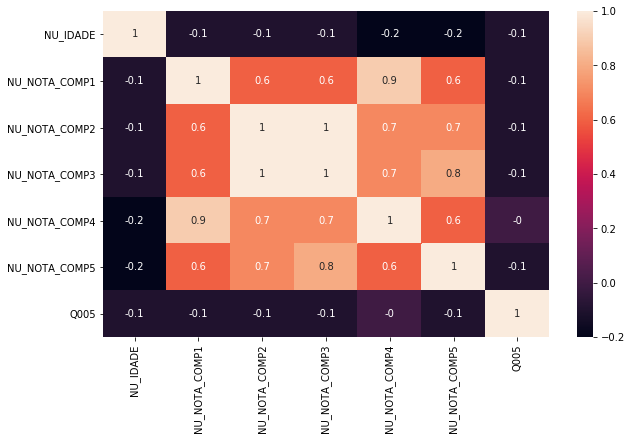

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))

vg_corr = df.filter(quanti).corr().round(1)
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

In [41]:
df[["NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP3","NU_NOTA_COMP4","NU_NOTA_COMP5"]].head(10)

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
104354,120,100,100,100,100
615010,120,120,120,100,100
680984,120,180,160,160,160
328498,180,200,200,160,160
352678,120,40,40,120,40
362607,180,200,160,160,180
686281,120,120,120,120,80
3790,120,140,120,80,60
180944,120,140,140,120,140
515263,80,120,120,100,40


In [37]:
columns_drop = ["NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP3","NU_NOTA_COMP4","NU_NOTA_COMP5"]
for var in columns_drop:
  valor = dic[var]
  print(var,"-",valor)

NU_NOTA_COMP1 - Nota da competência 1 - Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.
NU_NOTA_COMP2 - Nota da competência 2 - Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa.
NU_NOTA_COMP3 - Nota da competência 3 - Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista.
NU_NOTA_COMP4 - Nota da competência 4 - Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.
NU_NOTA_COMP5 - Nota da competência 5 - Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos.


As variáveis de competencia formam a nota de redação e são correlacionadas entre si

In [38]:
columns_drop = ["NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP3","NU_NOTA_COMP4","NU_NOTA_COMP5"]
df.drop(columns_drop, inplace=True, axis=1)

In [40]:
df.shape

(1098311, 41)

### Correlação Variaveis Quali

In [41]:
import sklearn.preprocessing as preprocessing

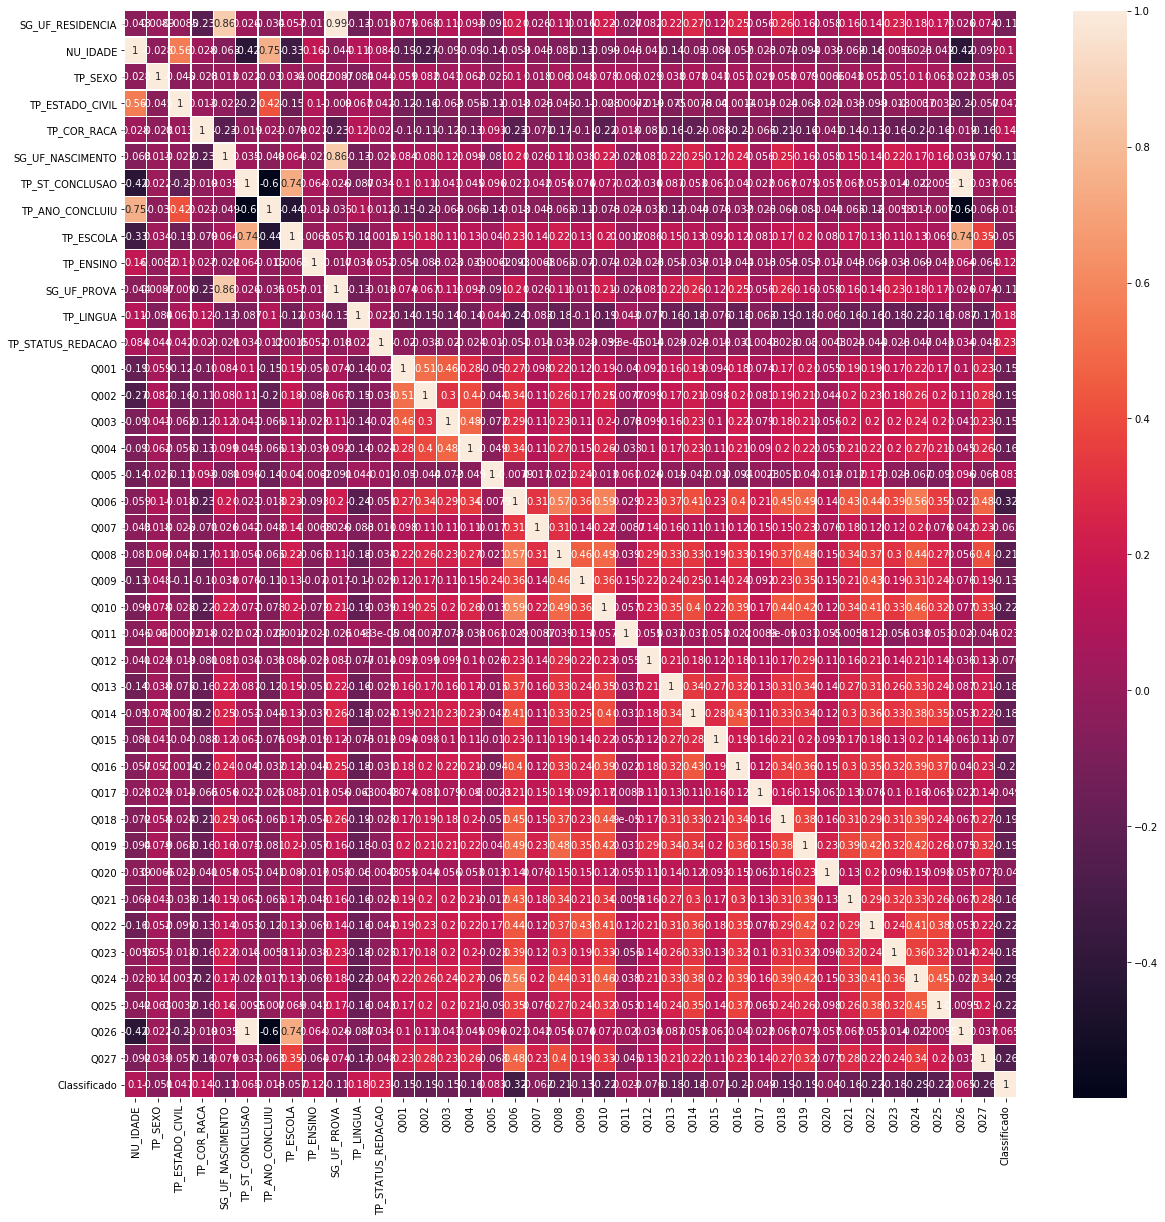

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Classificado
591110,3,17.0,0,0,3,3,1,0,0,1.0,...,1,1,0,3,0,0,0,1,0,1
591111,18,19.0,0,0,3,18,1,0,2,1.0,...,0,0,0,1,1,0,0,1,0,1
591112,25,18.0,1,0,1,15,1,0,1,1.0,...,2,0,1,3,1,0,1,1,0,1
591114,18,18.0,1,0,3,18,1,0,1,1.0,...,1,1,0,4,0,1,1,1,0,1
591115,9,17.0,0,0,1,9,1,0,0,1.0,...,1,1,1,3,0,2,1,1,0,1


In [40]:
# Encode das váriaveis categoricas como números
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders


# Calcular a correlação e plotar
encoded_data, _ = number_encode_features(df)
plt.figure(figsize = (20,20))

sns.heatmap(encoded_data.corr().iloc[:, 1:41:], annot=True, linewidths=.4)
#sns.heatmap(encoded_data.corr(), square=True)
plt.show()

encoded_data.tail(5)

### Excluir Correlações muito altas para evitar o problema de multicolinearidade

#### Verificar correlação perfeita entre Q026 e TP_ST_CONCLUSAO

In [42]:
dic['Q026']

'Você já concluiu ou está concluindo o Ensino Médio?'

In [43]:
df[['Q026','TP_ST_CONCLUSAO']].head(5)

,Q026,TP_ST_CONCLUSAO
104354,B,2
615010,B,2
680984,A,1
328498,B,2
352678,A,1


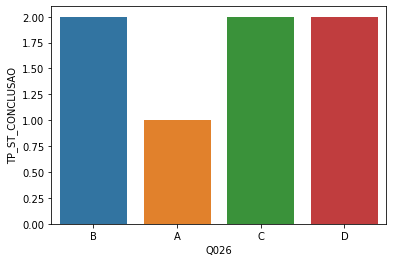

In [44]:
sns.barplot(data=df, x='Q026', y='TP_ST_CONCLUSAO');

In [45]:
#Excluir as duas variável Q026 e 'TP_ST_CONCLUSAO', pois a base só tem duas categorias (1 e 2) devido a filtros de exclusão anteriores
df.drop(['Q026','TP_ST_CONCLUSAO'],inplace=True, axis=1)

#### Verificar correlação variaveis de UF (Prova e Nascimento)

In [46]:
df[['SG_UF_RESIDENCIA','SG_UF_NASCIMENTO','SG_UF_PROVA']]

,SG_UF_RESIDENCIA,SG_UF_NASCIMENTO,SG_UF_PROVA
104354,MG,MG,MG
615010,PI,PI,PI
680984,BA,BA,BA
328498,SP,SP,SP
352678,PE,PE,PE
...,...,...,...
591110,AP,AP,AP
591111,RJ,RJ,RJ
591112,SP,PE,SP
591114,RJ,RJ,RJ


In [47]:
df.drop(['SG_UF_NASCIMENTO','SG_UF_PROVA'],inplace=True, axis=1)

#### Correlação entre TP_ANO_CONCLUI e IDADE
Alternativas TP_ANO_CONCLUIU
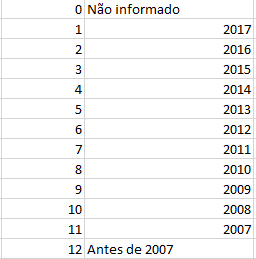

In [48]:
dic['TP_ANO_CONCLUIU']

'Ano de Conclusão do Ensino Médio'

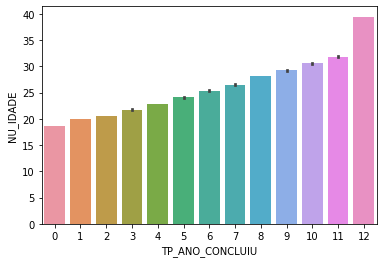

In [53]:
sns.barplot(data=df, x='TP_ANO_CONCLUIU', y='NU_IDADE');

A partir do gráfico acima, é notável que quanto maior a idade, maior o tempo que a pessoa concluiu o ensino médio
Como a variavel 'TP_ANO_CONCLUIU' também tem média correlação com a variavel Q006 iremos exclui-la

In [49]:
df.drop(['TP_ANO_CONCLUIU'],inplace=True, axis=1)

In [50]:
#Variavéis excluidas devido a alta correlação
excluidas = ['Q026','TP_ST_CONCLUSAO','SG_UF_NASCIMENTO','SG_UF_PROVA','TP_ANO_CONCLUIU']

In [51]:
for var in excluidas:
  valor = dic[var]
  print(var,"-",valor)

Q026 - Você já concluiu ou está concluindo o Ensino Médio?
TP_ST_CONCLUSAO - Situação de conclusão do Ensino Médio
SG_UF_NASCIMENTO - Sigla da Unidade da Federação de nascimento
SG_UF_PROVA - Sigla da Unidade da Federação da aplicação da prova
TP_ANO_CONCLUIU - Ano de Conclusão do Ensino Médio


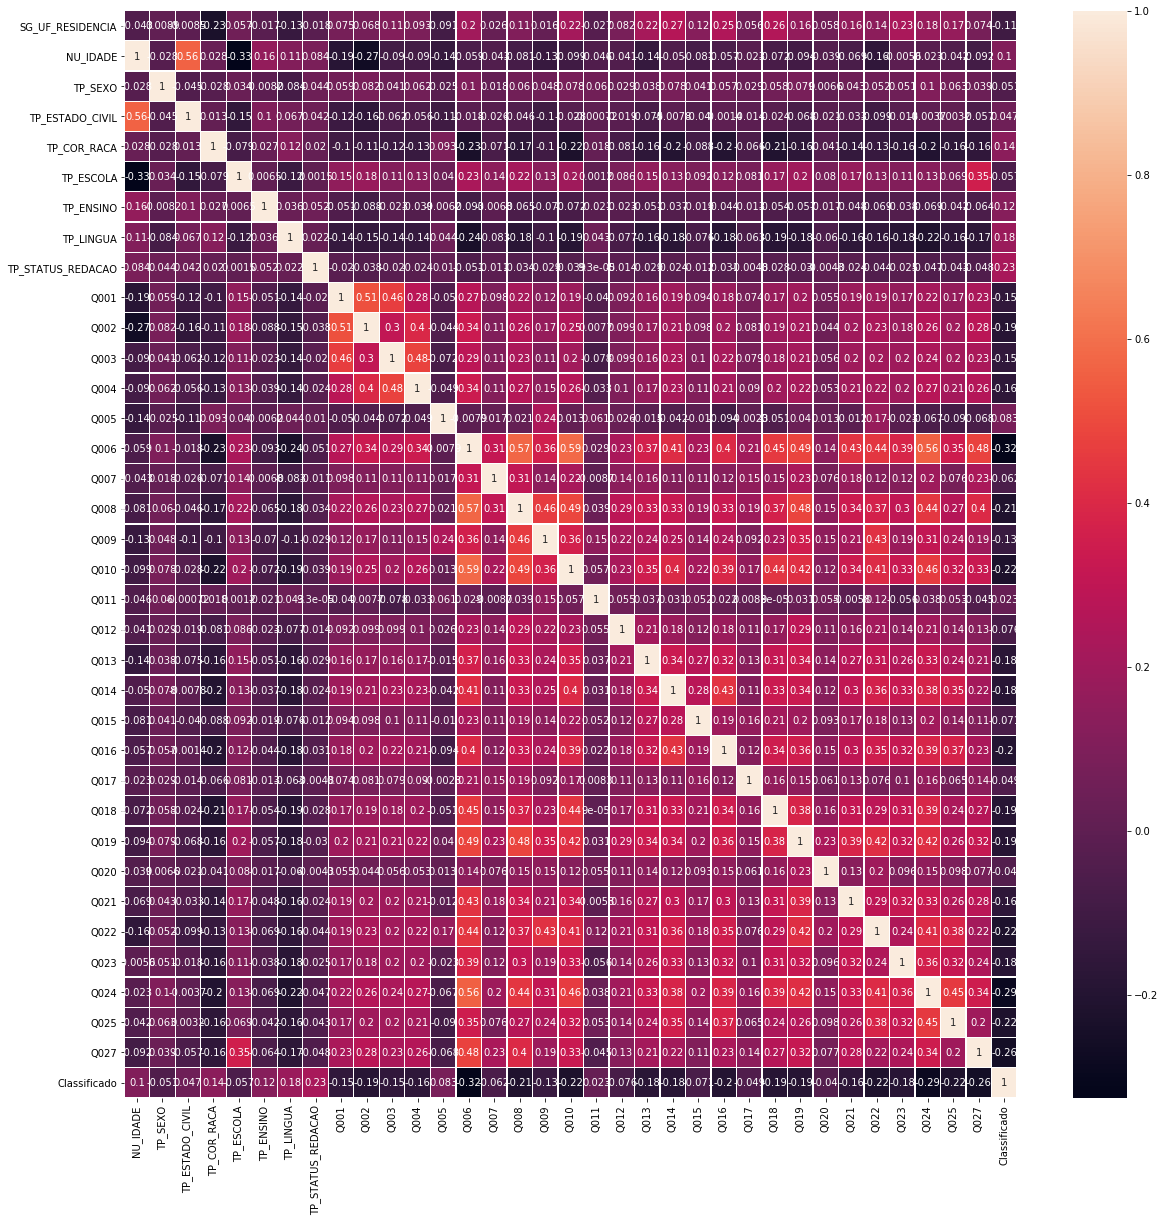

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,TP_ENSINO,TP_LINGUA,TP_STATUS_REDACAO,Q001,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q027,Classificado
591110,3,17.0,0,0,3,0,1.0,1,0,7,...,0,1,1,0,3,0,0,0,0,1
591111,18,19.0,0,0,3,2,1.0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
591112,25,18.0,1,0,1,1,1.0,0,3,7,...,0,2,0,1,3,1,0,1,0,1
591114,18,18.0,1,0,3,1,1.0,1,0,3,...,0,1,1,0,4,0,1,1,0,1
591115,9,17.0,0,0,1,0,1.0,0,0,5,...,0,1,1,1,3,0,2,1,0,1


In [52]:
# Encode das váriaveis categoricas como números
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders


# Calcular a correlação e plotar
encoded_data, _ = number_encode_features(df)
plt.figure(figsize = (20,20))

sns.heatmap(encoded_data.corr().iloc[:, 1:41:], annot=True, linewidths=.4)
#sns.heatmap(encoded_data.corr(), square=True)
plt.show()

encoded_data.tail(5)

### Recategorização Variáveis Qualitativas 

In [53]:
dic['Q006']

'Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)'

#### Recategorizar a váriavel Q006 (Renda Familiar) 
utilizando os critérios do IBGE para classes sociais baseada nos sálarios minimos
Fonte: https://thiagorodrigo.com.br/artigo/faixas-salariais-classe-social-abep-ibge/
Salário minimo em 2018:    R$ 954
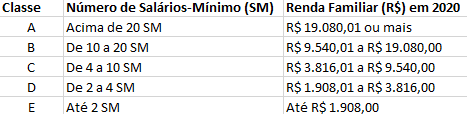
Alternativas/Valores para a questão
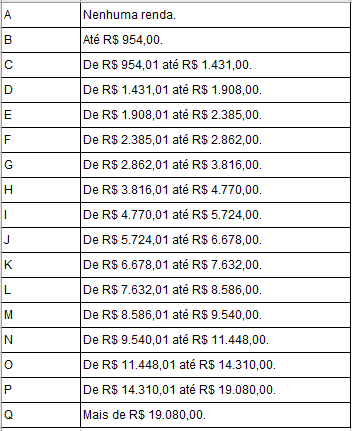

In [54]:
CA = ('Q')
CB = ('N','O','P')
CC = ('H','I','J','K','L','M')
CD = ('E','F','G')
CE = ('A','B','C','D')

In [55]:
df['Q006'].value_counts(normalize=True)

B    0.295789
C    0.276620
D    0.088564
E    0.084326
G    0.055429
A    0.053835
F    0.036142
H    0.030200
I    0.023609
J    0.013011
K    0.008267
N    0.007298
L    0.006194
Q    0.005450
M    0.005423
O    0.005277
P    0.004566
Name: Q006, dtype: float64

In [56]:
for val in df["Q006"]:
    if val in CE:
        df["Q006"].replace({val:'CE'},inplace=True)
    elif val in CD:
        df["Q006"].replace({val:'CD'},inplace=True)
    elif val in CC:
        df["Q006"].replace({val:'CC'},inplace=True)    
    elif val in CB:
        df["Q006"].replace({val:'CB'},inplace=True)
    elif val in CA:
        df["Q006"].replace({val:'CA'},inplace=True)

In [57]:
df['Q006'].value_counts(normalize=True)

CE    0.714808
CD    0.175896
CC    0.086704
CB    0.017141
CA    0.005450
Name: Q006, dtype: float64

In [58]:
"""df["REG_RES"] = df["SG_UF_RESIDENCIA"]
ND = ("AC","AP","AM","PA","RO","RR","TO")
NT = ("AL","BA","CE","MA","PB","PE","PI","RN","SE")
CO = ("DF","GO","MT","MS")
SUD = ("ES","MG","RJ","SP")
SUL = ("PR","RS","SC")

for val in df["REG_RES"]:
    if val in NT:
        df["REG_RES"].replace({val:'NT'},inplace=True)
    elif val in ND:
        df["REG_RES"].replace({val:'NT'},inplace=True)
    elif val in CO:
        df["REG_RES"].replace({val:'CO'},inplace=True)    
    elif val in SUD:
        df["REG_RES"].replace({val:'SUD'},inplace=True)
    elif val in SUL:
        df["REG_RES"].replace({val:'SUL'},inplace=True)"""

'df["REG_RES"] = df["SG_UF_RESIDENCIA"]\nND = ("AC","AP","AM","PA","RO","RR","TO")\nNT = ("AL","BA","CE","MA","PB","PE","PI","RN","SE")\nCO = ("DF","GO","MT","MS")\nSUD = ("ES","MG","RJ","SP")\nSUL = ("PR","RS","SC")\n\nfor val in df["REG_RES"]:\n    if val in NT:\n        df["REG_RES"].replace({val:\'NT\'},inplace=True)\n    elif val in ND:\n        df["REG_RES"].replace({val:\'NT\'},inplace=True)\n    elif val in CO:\n        df["REG_RES"].replace({val:\'CO\'},inplace=True)    \n    elif val in SUD:\n        df["REG_RES"].replace({val:\'SUD\'},inplace=True)\n    elif val in SUL:\n        df["REG_RES"].replace({val:\'SUL\'},inplace=True)'

In [59]:
df.shape

(1098311, 36)

Export para o R - ver arquivo

In [63]:
#df.to_csv(r'C:\Users\Dani\Documents\TCC\df_enem_r.csv', index = False)

## IF Value

In [64]:
'''def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, i'''

"def calculate_woe_iv(dataset, feature, target):\n    lst = []\n    for i in range(dataset[feature].nunique()):\n        val = list(dataset[feature].unique())[i]\n        lst.append({\n            'Value': val,\n            'All': dataset[dataset[feature] == val].count()[feature],\n            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],\n            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]\n        })\n        \n    dset = pd.DataFrame(lst)\n    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()\n    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()\n    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])\n    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})\n    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']\n    iv = dset['IV'].sum()\n    \n    dset = dset.sort_values(by='WoE')\n    \n    return dset, i"

In [60]:
#calculate_woe_iv(df_train,'NU_IDADE','Classificado')

### Aplicar técnicas de Feature engineering

Nas variáveis com baixa cardinalidade (<= 10)(`cat_low_card`) - aplicar a técnica de one-hot encoder (dummy).

Nas variáveis com alta cardinalidade (>10) (`cat_high_card`) - aplicar a técnica de label encoder.

Aula 71- Feature engineering 



#### One Hot Encoder

In [61]:
''''cat_high_card = ['SG_UF_RESIDENCIA']
cat_low_card  = ['TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ESCOLA',
       'TP_LINGUA', 'TP_STATUS_REDACAO', 'Q001', 'Q002', 'Q003',
       'Q004', 'Q006','Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012',
       'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021',
       'Q022', 'Q023', 'Q024', 'Q025', 'Q027']'''

"'cat_high_card = ['SG_UF_RESIDENCIA']\ncat_low_card  = ['TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ESCOLA',\n       'TP_LINGUA', 'TP_STATUS_REDACAO', 'Q001', 'Q002', 'Q003',\n       'Q004', 'Q006','Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012',\n       'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021',\n       'Q022', 'Q023', 'Q024', 'Q025', 'Q027']"

#### Váriaveis definidas no R por meio do IV > 0.02

In [63]:
cat_high_card = ['SG_UF_RESIDENCIA']
cat_low_card  = ['Q006','Q024','Q027','Q003','Q001', 'Q004', 'Q002','Q010','Q008']
target= df[['Classificado']]

In [64]:
df_onehot = df[cat_low_card].copy()

In [65]:
df_onehot = pd.get_dummies(df_onehot, columns=cat_low_card, drop_first=True)

In [66]:
df_onehot.head()

,Q006_CB,Q006_CC,Q006_CD,Q006_CE,Q024_B,Q024_C,Q024_D,Q024_E,Q027_B,Q027_C,...,Q002_G,Q002_H,Q010_B,Q010_C,Q010_D,Q010_E,Q008_B,Q008_C,Q008_D,Q008_E
104354,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
615010,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
680984,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
328498,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
352678,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Label Encoder

In [67]:
df_label_encode = df[cat_high_card].copy()

In [68]:
uf_cols = ['SG_UF_RESIDENCIA']
for col in uf_cols:
    uf_encoder = {valor:chave for (chave,valor) in list(enumerate(df_label_encode[col].value_counts().index, start=1))}
    df_label_encode[col+'_num'] = df_label_encode[col].map(uf_encoder)

In [69]:
df_label_encode.head()

,SG_UF_RESIDENCIA,SG_UF_RESIDENCIA_num
104354,MG,2
615010,PI,13
680984,BA,3
328498,SP,1
352678,PE,7


In [78]:
#q06_encoder = {valor:chave for (chave,valor) in list(enumerate(df_label_encode['Q006'].value_counts().index, start=1))}

In [79]:
#df_label_encode['q006_num'] = df_label_encode['Q006'].map(q06_encoder)

In [80]:
#df_categoricas = pd.concat([df_onehot, df_label_encode.drop(['SG_UF_RESIDENCIA'], axis=1)], axis=1)

In [70]:
df_categoricas = pd.concat([df_onehot,target], axis=1)

In [71]:
df_categoricas.head()

,Q006_CB,Q006_CC,Q006_CD,Q006_CE,Q024_B,Q024_C,Q024_D,Q024_E,Q027_B,Q027_C,...,Q002_H,Q010_B,Q010_C,Q010_D,Q010_E,Q008_B,Q008_C,Q008_D,Q008_E,Classificado
104354,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
615010,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
680984,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
328498,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
352678,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Juntando todos os dados

In [72]:
#df_train = pd.concat([df.drop(cat_high_card + cat_low_card, axis=1), df_categoricas], axis=1)

In [73]:
df_train = df_categoricas

In [74]:
df_train.shape

(1098311, 46)

In [75]:
X = df_train.drop('Classificado', axis=1)
y = df_train['Classificado']

In [86]:
X.head()

,Q006_CB,Q006_CC,Q006_CD,Q006_CE,Q024_B,Q024_C,Q024_D,Q024_E,Q027_B,Q027_C,...,Q002_G,Q002_H,Q010_B,Q010_C,Q010_D,Q010_E,Q008_B,Q008_C,Q008_D,Q008_E
104354,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
615010,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
680984,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
328498,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
352678,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Train-Test Split

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [77]:
len(X_test)

329494

In [78]:
len(X_train)

768817

## Feature Selection Methods

In [79]:
#!pip install mlxtend

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

#### Fisher Score - Chi Quadrado

1. Bom para variáveis categóricas
2. Variável resposta deve ser binária
3. Variáveis devem ser positivas, tipicamente dummies, frequências ou contagens

In [80]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [81]:
X_chi2 = X_train.copy()

In [82]:
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(X_chi2, y_train)

SelectKBest(k=10, score_func=<function chi2 at 0x0000021E33F4C168>)

In [83]:
X_chi2[X_chi2.columns[chi_selector.get_support()]].head()

,Q006_CC,Q006_CD,Q006_CE,Q024_B,Q024_C,Q027_D,Q003_D,Q001_F,Q004_D,Q010_B
55936,0,0,1,1,0,0,1,0,1,1
212146,0,0,1,1,0,0,0,0,0,0
490029,0,1,0,1,0,0,0,0,1,1
87091,0,0,1,0,0,0,0,0,0,0
634934,0,0,1,1,0,0,0,0,0,1


#### Embedded Methods

Métodos baseados nas importâncias encontradas dentro (embedded) de cada tipo de modelo/estimador

`Random Forest`

In [84]:
from sklearn.feature_selection import RFE

rf_rfe_selector = RFE(estimator=RandomForestClassifier(random_state=42), step=1, n_features_to_select=20)

In [85]:
#rf_rfe_selector.fit(X_train, y_train)

In [86]:
#X_train[X_train.columns[rf_rfe_selector.get_support()]].head()

`Decision Tree`

In [87]:
from sklearn.tree import DecisionTreeClassifier

dt_rfe_selector = RFE(estimator=DecisionTreeClassifier(random_state=42), step=1, n_features_to_select=10)

In [ ]:
#dt_rfe_selector.fit(X_train, y_train)

In [ ]:
#X_train[X_train.columns[dt_rfe_selector.get_support()]].head()

`Xgboost`

In [88]:
from xgboost import XGBClassifier

xgb_rfe_selector = RFE(estimator=XGBClassifier(random_state=42), step=1, n_features_to_select=10)

In [89]:
#xgb_rfe_selector.fit(X_train, y_train)

In [90]:
#X_train[X_train.columns[xgb_rfe_selector.get_support()]].head()

`Regressão Logística`

In [91]:
from sklearn.linear_model import LogisticRegression

lr_rfe_selector = RFE(estimator=LogisticRegression(random_state=42), step=1, n_features_to_select=10)

In [92]:
#lr_rfe_selector.fit(X_train, y_train)

In [93]:
#X_train[X_train.columns[lr_rfe_selector.get_support()]].head()

#### Comparando as várias técnicas de seleção de variáveis

In [94]:
'''feat_sel_comparision_df = pd.DataFrame({'Features': X_train.columns,
                                        'Decision Tree': dt_rfe_selector.get_support(), 
                                        'Random Forest': rf_rfe_selector.get_support(),
                                        'XGBoost': xgb_rfe_selector.get_support(), 
                                        'Logistic Regression': lr_rfe_selector.get_support()})

feat_sel_comparision_df['Total'] = feat_sel_comparision_df.sum(axis=1)
feat_sel_comparision_df = feat_sel_comparision_df.sort_values(by='Total', ascending=False)
feat_sel_comparision_df'''

"feat_sel_comparision_df = pd.DataFrame({'Features': X_train.columns,\n                                        'Decision Tree': dt_rfe_selector.get_support(), \n                                        'Random Forest': rf_rfe_selector.get_support(),\n                                        'XGBoost': xgb_rfe_selector.get_support(), \n                                        'Logistic Regression': lr_rfe_selector.get_support()})\n\nfeat_sel_comparision_df['Total'] = feat_sel_comparision_df.sum(axis=1)\nfeat_sel_comparision_df = feat_sel_comparision_df.sort_values(by='Total', ascending=False)\nfeat_sel_comparision_df"

In [109]:
#features_selecionadas = list(feat_sel_comparision_df.query('Total == 4')['Features'].values)
features_selecionadas = df[["Q006","Q024","Q027","Q003","Q001","Q004","Q002","Q010","Q008"]]

In [110]:
print(features_selecionadas)

       Q006 Q024 Q027 Q003 Q001 Q004 Q002 Q010 Q008
104354   CC    D    D    D    E    D    D    B    E
615010   CC    D    D    E    E    E    E    B    C
680984   CE    B    D    B    B    B    C    B    B
328498   CB    C    D    E    F    E    F    D    E
352678   CD    B    A    B    D    D    F    A    B
...     ...  ...  ...  ...  ...  ...  ...  ...  ...
591110   CE    A    A    F    H    F    E    A    B
591111   CE    A    A    B    A    A    A    A    B
591112   CE    A    A    B    H    B    B    A    B
591114   CD    B    A    A    D    B    E    B    B
591115   CC    C    A    D    F    D    F    A    B

[1098311 rows x 9 columns]


In [95]:
X_train.head()

,Q006_CB,Q006_CC,Q006_CD,Q006_CE,Q024_B,Q024_C,Q024_D,Q024_E,Q027_B,Q027_C,...,Q002_G,Q002_H,Q010_B,Q010_C,Q010_D,Q010_E,Q008_B,Q008_C,Q008_D,Q008_E
55936,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
212146,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
490029,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
87091,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
634934,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [96]:
X_test.head()

,Q006_CB,Q006_CC,Q006_CD,Q006_CE,Q024_B,Q024_C,Q024_D,Q024_E,Q027_B,Q027_C,...,Q002_G,Q002_H,Q010_B,Q010_C,Q010_D,Q010_E,Q008_B,Q008_C,Q008_D,Q008_E
197066,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
322698,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
341541,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
540345,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
437383,0,0,0,1,1,0,0,0,0,1,...,0,1,1,0,0,0,1,0,0,0


### Comparando Modelos

`Regressão Logística`

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test) 

lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

y_pred_train = lr.predict(X_train_scaled)
y_pred_test  = lr.predict(X_test_scaled)

#Calculo Acurácia
lr_acc_treino = accuracy_score(y_train, y_pred_train)
lr_acc_teste  = accuracy_score(y_test, y_pred_test)

print(f"Acurácia de Treino: {lr_acc_treino}")
print(f"Acurácia de Teste: {lr_acc_teste}")

Acurácia de Treino: 0.6630069314284154
Acurácia de Teste: 0.6623459000770879


In [98]:
import statsmodels.api as sm

modelo = sm.Logit(y_train, X_train).fit()
modelo.summary()

Optimization terminated successfully.
         Current function value: 0.606497
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Classificado   No. Observations:               768817
Model:                          Logit   Df Residuals:                   768772
Method:                           MLE   Df Model:                           44
Date:                Mon, 05 Oct 2020   Pseudo R-squ.:                  0.1249
Time:                        20:43:38   Log-Likelihood:            -4.6628e+05
converged:                       True   LL-Null:                   -5.3286e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Q006_CB        0.5297      0.043     12.247      0.000       0.445       0.614
Q006_CC        0.9458      0.027     35.431      0.000       0.893       0.998
Q006_CD        1.2702      0.025     51.070      0.000       1.221       1.319
Q006_CE        1.7009      0.024     71.197      0.000       1.654       1.748
Q024_B        -0.5160      0.006    -93.631      0.000      -0.527      -0.505
Q024_C        -0.8621      0.014    -61.994      0.000      -0.889      -0.835
Q024_D        -0.9553      0.031    -31.293      0.000      -1.015      -0.895
Q024_E        -1.0032      0.054    -18.572      0.000      -1.109      -0.897
Q027_B        -0.2211      0.011    -20.779      0.000      -0.242      -0.200
Q027_C        -0.5720      0.018    -31.934      0.000      -0.607      -0.537
Q027_D        -1.1459      0.015    -74.003      0.000      -1.176      -1.116
Q027_E        -1.1663      0.026    -45.309      0.000      -1.217      -1.116
Q027_F        -0.3511      0.115     -3.056      0.002      -0.576      -0.126
Q003_B        -0.1856      0.009    -21.309      0.000      -0.203      -0.169
Q003_C        -0.2802      0.009    -31.921      0.000      -0.297      -0.263
Q003_D        -0.4345      0.012    -37.567      0.000      -0.457      -0.412
Q003_E        -0.2339      0.024     -9.797      0.000      -0.281      -0.187
Q003_F        -0.0685      0.011     -6.438      0.000      -0.089      -0.048
Q001_B        -0.1849      0.011    -16.123      0.000      -0.207      -0.162
Q001_C        -0.2370      0.013    -18.845      0.000      -0.262      -0.212
Q001_D        -0.2698      0.013    -20.318      0.000      -0.296      -0.244
Q001_E        -0.3564      0.013    -28.092      0.000      -0.381      -0.332
Q001_F        -0.5349      0.019    -28.276      0.000      -0.572      -0.498
Q001_G        -0.3856      0.025    -15.219      0.000      -0.435      -0.336
Q001_H        -0.2415      0.014    -16.907      0.000      -0.270      -0.214
Q004_B        -0.1606      0.008    -19.233      0.000      -0.177      -0.144
Q004_C        -0.1915      0.012    -15.507      0.000      -0.216      -0.167
Q004_D        -0.2296      0.012    -19.274      0.000      -0.253      -0.206
Q004_E        -0.1001      0.028     -3.557      0.000      -0.155      -0.045
Q004_F        -0.0166      0.012     -1.439      0.150      -0.039       0.006
Q002_B        -0.2661      0.014    -19.687      0.000      -0.293      -0.240
Q002_C        -0.3594      0.014    -25.321      0.000      -0.387      -0.332
Q002_D        -0.3880      0.015    -26.735      0.000      -0.416      -0.360
Q002_E        -0.4972      0.014    -35.609      0.000      -0.525      -0.470
Q002_F        -0.5866      0.018    -33.116      0.000      -0.621      -0.552
Q002_G        -0.4555      0.020    -22.548      0.000      -0.495      -0.416
Q002_H         0.1220      0.019      6.274      0.000       0.084       0.160
Q010_B        -0.0772      0.006    -12.437      0.000      -0.089      -0.065
Q0

In [99]:
modelo.params

Q006_CB    0.529674
Q006_CC    0.945763
Q006_CD    1.270199
Q006_CE    1.700920
Q024_B    -0.516048
Q024_C    -0.862142
Q024_D    -0.955326
Q024_E    -1.003231
Q027_B    -0.221133
Q027_C    -0.572045
Q027_D    -1.145885
Q027_E    -1.166267
Q027_F    -0.351119
Q003_B    -0.185584
Q003_C    -0.280217
Q003_D    -0.434455
Q003_E    -0.233948
Q003_F    -0.068517
Q001_B    -0.184861
Q001_C    -0.236995
Q001_D    -0.269777
Q001_E    -0.356363
Q001_F    -0.534861
Q001_G    -0.385606
Q001_H    -0.241522
Q004_B    -0.160622
Q004_C    -0.191545
Q004_D    -0.229589
Q004_E    -0.100114
Q004_F    -0.016627
Q002_B    -0.266126
Q002_C    -0.359412
Q002_D    -0.388032
Q002_E    -0.497185
Q002_F    -0.586584
Q002_G    -0.455480
Q002_H     0.121986
Q010_B    -0.077240
Q010_C    -0.050685
Q010_D     0.232753
Q010_E     0.418303
Q008_B    -0.237862
Q008_C    -0.269641
Q008_D    -0.256602
Q008_E    -0.279975
dtype: float64

In [100]:
scores_df = (
    df_train
    .assign(probs = modelo.predict(X))
    .assign(label = lambda x: np.where(x['probs'] > 0.5, 1, 0))
)

In [152]:
scores_df.sample(10)

,Q006_CB,Q006_CC,Q006_CD,Q006_CE,Q024_B,Q024_C,Q024_D,Q024_E,Q027_B,Q027_C,...,Q010_C,Q010_D,Q010_E,Q008_B,Q008_C,Q008_D,Q008_E,Classificado,probs,label
322239,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0.606242,1
357834,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.622876,1
271356,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.388269,0
105919,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0.469387,0
142267,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0.621979,1
435232,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.031397,0
261711,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.558363,1
402259,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.381816,0
76207,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0.490624,0
495228,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0.578476,1


In [101]:
from sklearn.metrics import accuracy_score

accuracy_score(scores_df['Classificado'], scores_df['label'])

0.6627776649783167

`Árvore de Decisão`

In [102]:
"""from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=123)
dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt  = dt.predict(X_test)

dt_acc_treino = accuracy_score(y_train, y_pred_train_dt)
dt_acc_teste  = accuracy_score(y_test, y_pred_test_dt)

print(f"Acurácia de Treino: {dt_acc_treino}")
print(f"Acurácia de Teste: {dt_acc_teste}")"""

'from sklearn.tree import DecisionTreeClassifier\ndt = DecisionTreeClassifier(random_state=123)\ndt.fit(X_train, y_train)\n\ny_pred_train_dt = dt.predict(X_train)\ny_pred_test_dt  = dt.predict(X_test)\n\ndt_acc_treino = accuracy_score(y_train, y_pred_train_dt)\ndt_acc_teste  = accuracy_score(y_test, y_pred_test_dt)\n\nprint(f"Acurácia de Treino: {dt_acc_treino}")\nprint(f"Acurácia de Teste: {dt_acc_teste}")'

#### Importância das variáveis

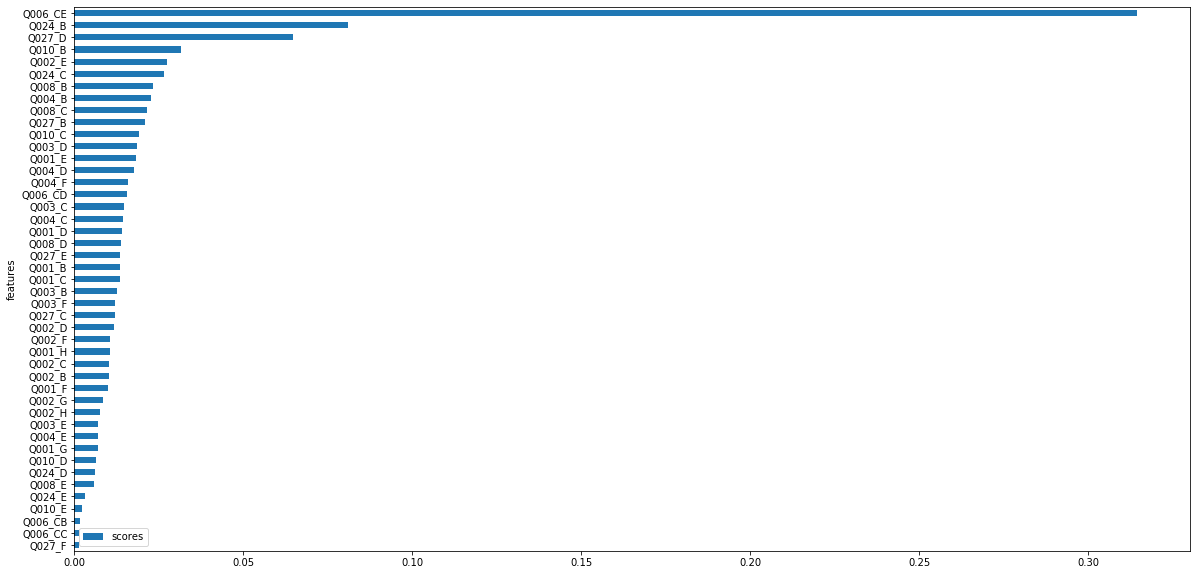

In [133]:
feature_importances_dt = pd.DataFrame({'features': X_train.columns, 'scores': dt.feature_importances_})
feature_importances_dt = feature_importances_dt.sort_values(by='scores', ascending=True)
feature_importances_dt.plot(kind='barh', x='features', y='scores',figsize=(20,10));

In [127]:
#!pip install scikit-plot

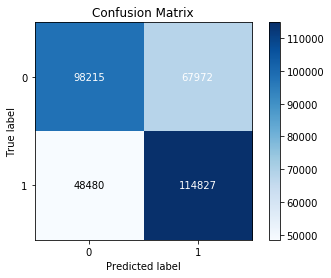

In [138]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_dt);

In [152]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred_test_dt)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

Sensibilidade = TP/(TP+FN)
Especificidade = FN/(FN+FP)
print(f"Sensibilidade= {Sensibilidade} e Especificidade  = {Especificidade}")

Sensibilidade= 0.7031358116920892 e Especificidade  = 0.4163088654552949


#### Visualizando a árvore

In [122]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(12, 8))

plot_tree(dt, ax=ax, filled=True, feature_names=X_train.columns, class_names=['Não', 'Sim'], rounded=True);

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000195D957AAF8> (for post_execute):


KeyboardInterrupt: 

In [ ]:
conda install python-graphviz

In [ ]:
#Aula Joao

from sklearn.tree import export_graphviz
export_graphviz(dt, out_file='d_tree_model.dot', feature_names=X_train.columns, class_names=['Não', 'Sim'],
                                rounded=True,proportion=False, precision=2, filled=True);


In [ ]:
!dot -Tpng d_tree_model.dot -o d_tree_model.png -Gdpi=600

## `Random Forest`

In [103]:
rf = RandomForestClassifier(random_state=123,
                           criterion='entropy',
                           n_estimators = 10,
                           max_depth=20)
rf.fit(X_train, y_train)

y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf  = rf.predict(X_test)

#Treno
#Acuracia
rf_acc_treino = accuracy_score(y_train, y_pred_train_rf)

rf_acc_teste  = accuracy_score(y_test, y_pred_test_rf)

print(f"Acurácia de Treino: {rf_acc_treino}")
print(f"Acurácia de Teste: {rf_acc_teste}")

Acurácia de Treino: 0.6817994399187323
Acurácia de Teste: 0.6573625012898565


In [104]:
#Cálculo da área sob curva ROC e Gini

#Treino
from sklearn.metrics import roc_curve, auc
fpr_rndforest_train, tpr_rndforest_train, thresholds = roc_curve(y_train, y_pred_train_rf)
roc_auc_rndforest_train = 100*round(auc(fpr_rndforest_train, tpr_rndforest_train), 2)
gini_rndforest_train = 100*round((2*roc_auc_rndforest_train/100 - 1), 2)
print("Gini e Área Curva ROC (Base de Treino):",gini_rndforest_train,roc_auc_rndforest_train)

#Teste
from sklearn.metrics import roc_curve, auc
fpr_rndforest_test, tpr_rndforest_test, thresholds = roc_curve(y_test, y_pred_test_rf)
roc_auc_rndforest_test = 100*round(auc(fpr_rndforest_test, tpr_rndforest_test), 2)
gini_rndforest_test = 100*round((2*roc_auc_rndforest_test/100 - 1), 2)
print("Gini e Área Curva ROC (Base de Teste):",gini_rndforest_test,roc_auc_rndforest_test)

Gini e Área Curva ROC (Base de Treino): 36.0 68.0
Gini e Área Curva ROC (Base de Teste): 32.0 66.0


#### Treino

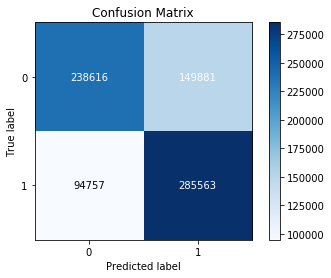

In [105]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_train, y_pred_train_rf);

In [124]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_train, y_pred_train_rf)


TP = CM[0][0]
FN = CM[1][0]
TN = CM[1][1]
FP = CM[0][1]

Sensibilidade = TP/(TP+FN)
Especificidade = TN/(TN+FP)
print(f"Sensibilidade= {Sensibilidade} e Especificidade  = {Especificidade}")

Sensibilidade= 0.7157628242239173 e Especificidade  = 0.6557973011454975


#### Teste

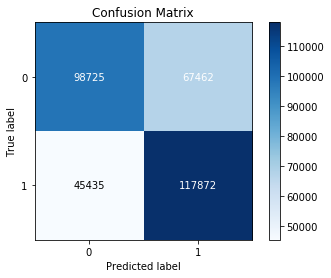

In [125]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_rf);

In [127]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred_test_rf)


TP = CM[0][0]
FN = CM[1][0]
TN = CM[1][1]
FP = CM[0][1]

Sensibilidade = TP/(TP+FN)
Especificidade = TN/(TN+FP)
print(f"Sensibilidade= {Sensibilidade} e Especificidade  = {Especificidade}")

Sensibilidade= 0.6848293562708102 e Especificidade  = 0.6359977122384451


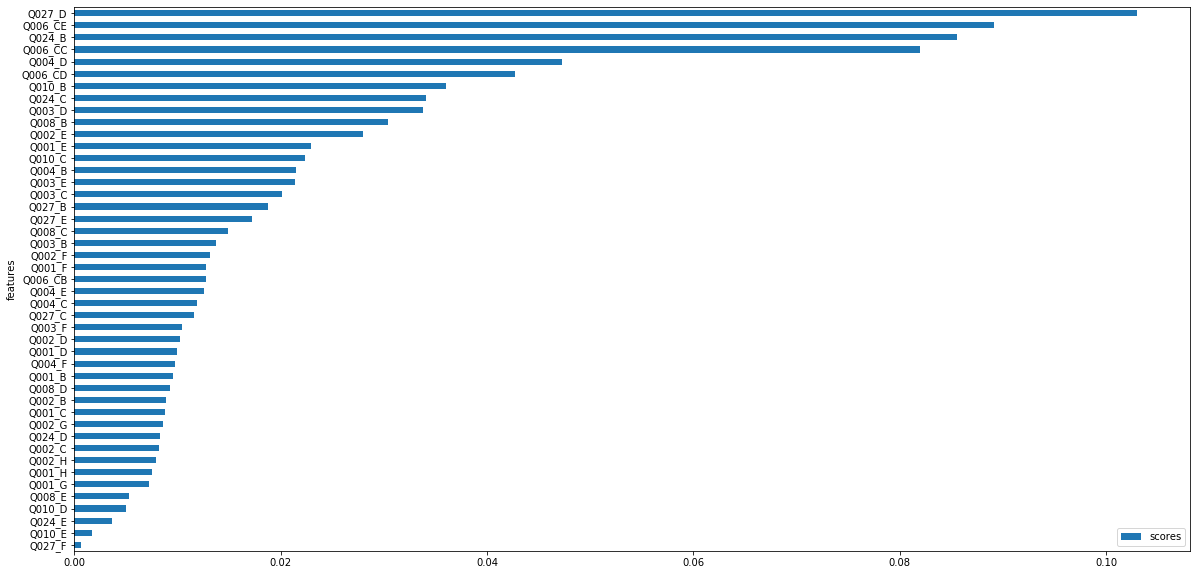

In [128]:
feature_importances_rf = pd.DataFrame({'features': X_train.columns, 'scores': rf.feature_importances_})
feature_importances_rf = feature_importances_rf.sort_values(by='scores', ascending=True)
feature_importances_rf.plot(kind='barh', x='features', y='scores',figsize=(20,10));

#### Validação Cruzada Usando K-Fold Cross Validation

In [183]:
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=5, scoring='accuracy')

KeyboardInterrupt: 

In [ ]:
cv_results.mean()

## `XGBoost`

In [ ]:
conda install -c conda-forge xgboost

In [ ]:
!pip install xgboost

In [131]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=123,
                     n_estimators = 20,
                      max_depth=20)
xgb.fit(X_train, y_train)

y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb  = xgb.predict(X_test)

xgb_acc_treino = accuracy_score(y_train, y_pred_train_xgb)
xgb_acc_teste  = accuracy_score(y_test, y_pred_test_xgb)

print(f"Acurácia de Treino: {xgb_acc_treino}")
print(f"Acurácia de Teste: {xgb_acc_teste}")

Acurácia de Treino: 0.6887529802280646
Acurácia de Teste: 0.6550407594675473


In [132]:
#Cálculo da área sob curva ROC e Gini

#Treino
from sklearn.metrics import roc_curve, auc
fpr_xgboost_train, tpr_xgboost_train, thresholds = roc_curve(y_train, y_pred_train_xgb)
roc_auc_xgboost_train = 100*round(auc(fpr_xgboost_train, tpr_xgboost_train), 2)
gini_xgboost_train = 100*round((2*roc_auc_xgboost_train/100 - 1), 2)
print("Gini e Área Curva ROC (Base de Treino):",gini_xgboost_train,roc_auc_xgboost_train)

#Teste
fpr_xgboost_test, tpr_xgboost_test, thresholds = roc_curve(y_test, y_pred_test_xgb)
roc_auc_xgboost_test = 100*round(auc(fpr_xgboost_test, tpr_xgboost_test), 2)
gini_xgboost_test = 100*round((2*roc_auc_xgboost_test/100 - 1), 2)
print("Gini e Área Curva ROC (Base de Teste):",gini_xgboost_test,roc_auc_xgboost_test)

Gini e Área Curva ROC (Base de Treino): 38.0 69.0
Gini e Área Curva ROC (Base de Teste): 32.0 66.0


In [133]:
xgb.feature_importances_

array([0.00088953, 0.00100497, 0.01294847, 0.46618313, 0.01902431,
       0.02022642, 0.00374862, 0.00265218, 0.00151124, 0.00490397,
       0.3893514 , 0.03292574, 0.00105274, 0.0015199 , 0.00165513,
       0.00300056, 0.00129115, 0.00109994, 0.00115248, 0.00105362,
       0.00111061, 0.00170487, 0.00142505, 0.00105379, 0.00120006,
       0.00139594, 0.00145048, 0.00152793, 0.00100148, 0.00103857,
       0.0015892 , 0.00122696, 0.00127132, 0.00273834, 0.00149886,
       0.00100843, 0.00259788, 0.00091746, 0.0009655 , 0.0010559 ,
       0.00119172, 0.00088521, 0.00096359, 0.0009787 , 0.00100667],
      dtype=float32)

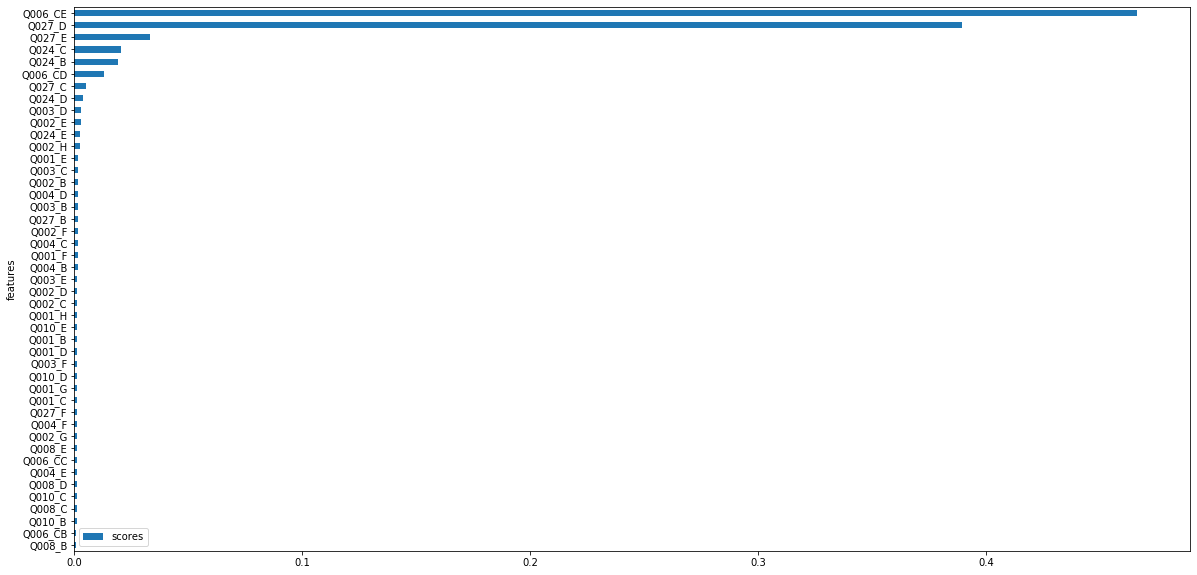

In [134]:
feature_importances_xgb = pd.DataFrame({'features': X_train.columns, 'scores': xgb.feature_importances_})
feature_importances_xgb = feature_importances_xgb.sort_values(by='scores', ascending=True)
feature_importances_xgb.plot(kind='barh', x='features', y='scores',figsize=(20,10));

#### Treino

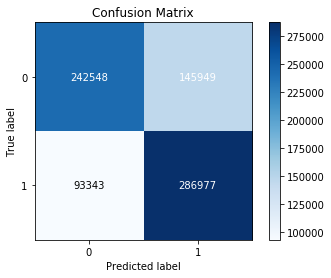

In [135]:
#import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_train, y_pred_train_xgb);

In [137]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_train, y_pred_train_xgb)


TP = CM[0][0]
FN = CM[1][0]
TN = CM[1][1]
FP = CM[0][1]

Sensibilidade = TP/(TP+FN)
Especificidade = TN/(TN+FP)
print(f"Sensibilidade= {Sensibilidade} e Especificidade  = {Especificidade}")

Sensibilidade= 0.7221033013685988 e Especificidade  = 0.6628777204418307


#### Teste

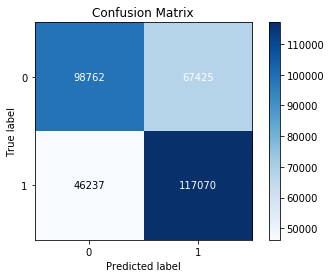

In [138]:
#import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_xgb);

In [139]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred_test_xgb)


TP = CM[0][0]
FN = CM[1][0]
TN = CM[1][1]
FP = CM[0][1]

Sensibilidade = TP/(TP+FN)
Especificidade = TN/(TN+FP)
print(f"Sensibilidade= {Sensibilidade} e Especificidade  = {Especificidade}")

Sensibilidade= 0.6811219387719916 e Especificidade  = 0.6345429415431313


In [142]:
model_comparison_df = pd.DataFrame({
    'Modelo': ['Random Forest', 'XGBoost'],
    'Acurácia de Treino': [rf_acc_treino, xgb_acc_treino],
    'Acurácia de Teste': [rf_acc_teste, xgb_acc_teste],
    'AUC':[roc_auc_rndforest_test, roc_auc_xgboost_test]
}).sort_values(by='Acurácia de Teste', ascending=False)

model_comparison_df

,Modelo,Acurácia de Treino,Acurácia de Teste,AUC
0,Random Forest,0.681799,0.657363,66.0
1,XGBoost,0.688753,0.655041,66.0
